In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import os
os.listdir(".")

['Untitled.ipynb',
 'test.csv',
 'titanic.zip',
 'train.csv',
 '.ipynb_checkpoints',
 'gender_submission.csv']

In [3]:
train_data = pd.read_csv("train.csv")

In [4]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [6]:
train_data.isnull().any()

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [7]:
ages = train_data['Age']

In [8]:
ages.max()

80.0

In [9]:
ages.min()

0.42

(array([ 54.,  46., 177., 169., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

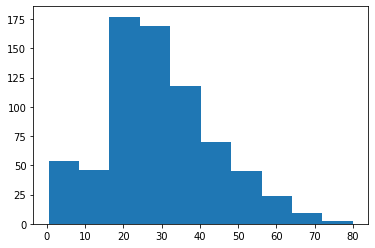

In [10]:
%matplotlib inline
plt.hist(ages.values,bins=10)

In [11]:
print("Mean : {} Median: {}".format(ages.mean(),ages.median()))

Mean : 29.69911764705882 Median: 28.0


In [12]:
ages.shape

(891,)

In [13]:
ages.loc[ages.isnull()] = ages.mean()

/Users/debadri.basak/blt/blt-code/blt-python3.6/lib/python3.7/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


(array([ 54.,  46., 177., 346., 118.,  70.,  45.,  24.,   9.,   2.]),
 array([ 0.42 ,  8.378, 16.336, 24.294, 32.252, 40.21 , 48.168, 56.126,
        64.084, 72.042, 80.   ]),
 <BarContainer object of 10 artists>)

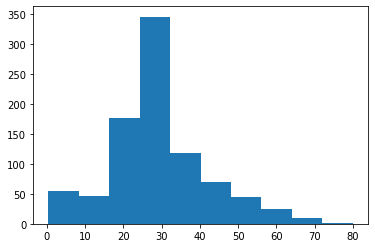

In [14]:
plt.hist(ages.values,bins=10)

In [15]:
train_data['Age'] = ages

In [16]:
train_data['Embarked'].value_counts(dropna=False)

S      644
C      168
Q       77
NaN      2
Name: Embarked, dtype: int64

In [27]:
train_data.loc[train_data.Embarked.isnull(),'Embarked'] = 'S'

In [28]:
train_data.loc[train_data.Embarked.isnull()].Embarked

Series([], Name: Embarked, dtype: object)

In [29]:
train_data.isnull().any()

PassengerId     False
Survived        False
Name            False
Sex             False
Age             False
SibSp           False
Parch           False
Ticket          False
Fare            False
Cabin            True
Embarked        False
Pclass_cat_1    False
Pclass_cat_2    False
Pclass_cat_3    False
dtype: bool

In [19]:
train_data = pd.concat([train_data,pd.get_dummies(train_data['Pclass'],prefix="Pclass_cat")],axis=1)
train_data.drop(columns=['Pclass'],inplace=True)

In [30]:
train_data = pd.concat([train_data,pd.get_dummies(train_data['Sex'],prefix="Sex_cat")],axis=1)
train_data.drop(columns=['Sex'],inplace=True)

In [31]:
train_data = pd.concat([train_data,pd.get_dummies(train_data['Embarked'],prefix="Embarked_cat")],axis=1)
train_data.drop(columns=['Embarked'],inplace=True)

In [32]:
train_data.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Pclass_cat_1', 'Pclass_cat_2', 'Pclass_cat_3',
       'Sex_cat_female', 'Sex_cat_male', 'Embarked_cat_C', 'Embarked_cat_Q',
       'Embarked_cat_S'],
      dtype='object')

In [33]:
test_data = pd.read_csv('test.csv')

In [34]:
test_data.isnull().any()

PassengerId    False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare            True
Cabin           True
Embarked       False
dtype: bool

(array([16., 16., 71., 97., 43., 37., 25., 17.,  9.,  1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

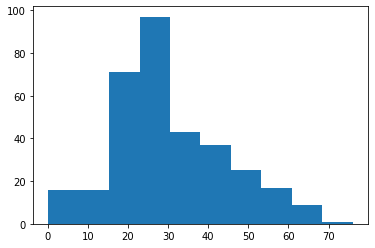

In [35]:
plt.hist(test_data['Age'].values,bins=10)

In [36]:
print("Mean: {} Median: {}".format(test_data['Age'].mean(),test_data['Age'].median()))

Mean: 30.272590361445783 Median: 27.0


In [37]:
test_data.Age.isnull().sum()

86

In [38]:
test_data.shape

(418, 11)

In [39]:
ages1 = test_data.Age

In [40]:
ages1[ages1.isnull()] = ages1.median()

/Users/debadri.basak/blt/blt-code/blt-python3.6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [41]:
test_data.Age = ages1

(array([ 16.,  16.,  71., 183.,  43.,  37.,  25.,  17.,   9.,   1.]),
 array([ 0.17 ,  7.753, 15.336, 22.919, 30.502, 38.085, 45.668, 53.251,
        60.834, 68.417, 76.   ]),
 <BarContainer object of 10 artists>)

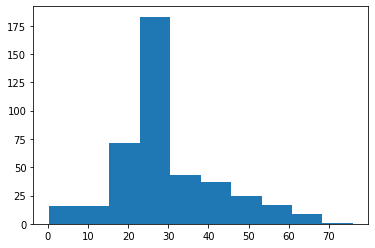

In [42]:
plt.hist(test_data['Age'].values,bins=10)

(array([338.,  48.,  11.,   2.,  10.,   7.,   0.,   0.,   0.,   1.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

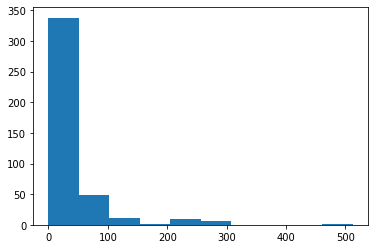

In [43]:
plt.hist(test_data['Fare'],bins=10)

(array([732., 106.,  31.,   2.,  11.,   6.,   0.,   0.,   0.,   3.]),
 array([  0.     ,  51.23292, 102.46584, 153.69876, 204.93168, 256.1646 ,
        307.39752, 358.63044, 409.86336, 461.09628, 512.3292 ]),
 <BarContainer object of 10 artists>)

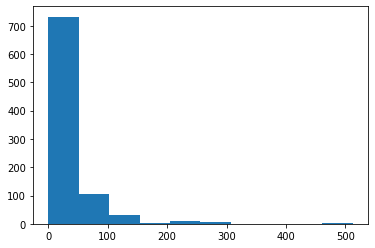

In [44]:
plt.hist(train_data['Fare'],bins=10)

In [48]:
test_data[test_data.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [49]:
test_data.Fare.mean()

35.627188489208635

In [50]:
test_data.Fare.median()

14.4542

In [52]:
test_data.Fare.min()

0.0

In [53]:
fares = test_data.Fare

In [54]:
fares[fares.isnull()] = fares.mean()

/Users/debadri.basak/blt/blt-code/blt-python3.6/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [56]:
fares.isnull().any()

False

In [57]:
test_data.Fare = fares

In [58]:
test_data = pd.concat([test_data,pd.get_dummies(test_data['Pclass'],prefix="Pclass_cat")],axis=1)
test_data.drop(columns=['Pclass'],inplace=True)
test_data = pd.concat([test_data,pd.get_dummies(test_data['Sex'],prefix="Sex_cat")],axis=1)
test_data.drop(columns=['Sex'],inplace=True)
test_data = pd.concat([test_data,pd.get_dummies(test_data['Embarked'],prefix="Embarked_cat")],axis=1)
test_data.drop(columns=['Embarked'],inplace=True)

In [59]:
from sklearn.ensemble import GradientBoostingClassifier

In [60]:
train_data.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Pclass_cat_1', 'Pclass_cat_2', 'Pclass_cat_3',
       'Sex_cat_female', 'Sex_cat_male', 'Embarked_cat_C', 'Embarked_cat_Q',
       'Embarked_cat_S'],
      dtype='object')

In [63]:
feature_set = [x for x in train_data.columns if x not in ['PassengerId', 'Survived','Ticket','Cabin','Name']]

In [64]:
feature_set

['Age',
 'SibSp',
 'Parch',
 'Fare',
 'Pclass_cat_1',
 'Pclass_cat_2',
 'Pclass_cat_3',
 'Sex_cat_female',
 'Sex_cat_male',
 'Embarked_cat_C',
 'Embarked_cat_Q',
 'Embarked_cat_S']

In [66]:
target_variable = 'Survived'

In [67]:
X_train = train_data[feature_set]
Y_train = train_data[target_variable]

In [68]:
model = GradientBoostingClassifier(random_state=0,verbose=2)

In [69]:
model.fit(X_train,Y_train.values.ravel())

      Iter       Train Loss   Remaining Time 
         1           1.2427            0.17s
         2           1.1688            0.15s
         3           1.1088            0.14s
         4           1.0592            0.13s
         5           1.0176            0.13s
         6           0.9826            0.12s
         7           0.9536            0.12s
         8           0.9276            0.11s
         9           0.9054            0.11s
        10           0.8886            0.11s
        11           0.8721            0.11s
        12           0.8587            0.10s
        13           0.8461            0.10s
        14           0.8355            0.10s
        15           0.8244            0.10s
        16           0.8158            0.10s
        17           0.8080            0.10s
        18           0.8025            0.09s
        19           0.7968            0.09s
        20           0.7916            0.09s
        21           0.7859            0.09s
        2

GradientBoostingClassifier(random_state=0, verbose=2)

In [70]:
X_test = test_data[feature_set]
y_test_pred = model.predict(X_test)

In [72]:
y_test_pred[:10]

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0])

In [75]:
df = pd.DataFrame({'PassengerId': test_data.PassengerId,'Survived' : y_test_pred.ravel()})

In [76]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [77]:
test_data.PassengerId.head()

0    892
1    893
2    894
3    895
4    896
Name: PassengerId, dtype: int64

In [78]:
df.shape

(418, 2)

In [79]:
df.to_csv('Titanic_Submission_1.csv',index=False)

In [80]:
y_train_pred = model.predict(X_train)

In [85]:
from sklearn.metrics import r2_score
from sklearn.metrics import f1_score

In [86]:
f1_score(Y_train,y_train_pred)

0.8536209553158707

In [87]:
from sklearn.ensemble import AdaBoostClassifier,VotingClassifier

In [88]:
model_2 = AdaBoostClassifier(random_state=0,learning_rate=0.1,n_estimators=200)

In [89]:
model_2.fit(X_train,Y_train.values.ravel())

AdaBoostClassifier(learning_rate=0.1, n_estimators=200, random_state=0)

In [90]:
y_train_pred_ada = model_2.predict(X_train)
f1_score(Y_train,y_train_pred_ada)

0.7619047619047619

In [91]:
from sklearn.preprocessing import KBinsDiscretizer 

In [92]:
fares = train_data['Fare']

In [93]:
binning = KBinsDiscretizer(n_bins=3,strategy='quantile',encode='ordinal')

In [96]:
binning.fit(fares.values.reshape(-1,1))

KBinsDiscretizer(encode='ordinal', n_bins=3)

In [98]:
train_data['Fare_cat'] = binning.transform(fares.values.reshape(-1,1))

In [99]:
train_data.head()

,PassengerId,Survived,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_cat_1,Pclass_cat_2,Pclass_cat_3,Sex_cat_female,Sex_cat_male,Embarked_cat_C,Embarked_cat_Q,Embarked_cat_S,Fare_cat
0,1,0,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,0,1,0,1,0,0,1,0.0
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,0,1,0,1,0,0,2.0
2,3,1,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,0,0,1,1,0,0,0,1,0.0
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,1,0,0,0,1,2.0
4,5,0,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,0,1,0,1,0,0,1,0.0


In [100]:
test_data['Fare_cat'] = binning.transform(test_data.Fare.values.reshape(-1,1))

In [101]:
test_data.head()

,PassengerId,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Pclass_cat_1,Pclass_cat_2,Pclass_cat_3,Sex_cat_female,Sex_cat_male,Embarked_cat_C,Embarked_cat_Q,Embarked_cat_S,Fare_cat
0,892,"Kelly, Mr. James",34.5,0,0,330911,7.8292,NaN,0,0,1,0,1,0,1,0,0.0
1,893,"Wilkes, Mrs. James (Ellen Needs)",47.0,1,0,363272,7.0000,NaN,0,0,1,1,0,0,0,1,0.0
2,894,"Myles, Mr. Thomas Francis",62.0,0,0,240276,9.6875,NaN,0,1,0,0,1,0,1,0,1.0
3,895,"Wirz, Mr. Albert",27.0,0,0,315154,8.6625,NaN,0,0,1,0,1,0,0,1,1.0
4,896,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",22.0,1,1,3101298,12.2875,NaN,0,0,1,1,0,0,0,1,1.0


In [102]:
age_binning = KBinsDiscretizer(n_bins=10,strategy='uniform',encode='ordinal')

In [103]:
age_binning.fit(train_data.Age.values.reshape(-1,1))

KBinsDiscretizer(encode='ordinal', n_bins=10, strategy='uniform')

In [104]:
train_data['Age group'] = age_binning.transform(train_data.Age.values.reshape(-1,1))

In [106]:
test_data['Age group'] = age_binning.transform(test_data.Age.values.reshape(-1,1))

In [108]:
train_data = pd.concat([train_data,pd.get_dummies(train_data['Age group'],prefix='age_cat')],axis=1)
train_data.drop(columns=['Age group'],inplace=True)
test_data = pd.concat([test_data,pd.get_dummies(test_data['Age group'],prefix='age_cat')],axis=1)
test_data.drop(columns=['Age group'],inplace=True)

In [109]:
train_data = pd.concat([train_data,pd.get_dummies(train_data['Fare_cat'],prefix='fare_cat')],axis=1)
train_data.drop(columns=['Fare_cat'],inplace=True)
test_data = pd.concat([test_data,pd.get_dummies(test_data['Fare_cat'],prefix='fare_cat')],axis=1)
test_data.drop(columns=['Fare_cat'],inplace=True)

In [110]:
train_data.columns

Index(['PassengerId', 'Survived', 'Name', 'Age', 'SibSp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Pclass_cat_1', 'Pclass_cat_2', 'Pclass_cat_3',
       'Sex_cat_female', 'Sex_cat_male', 'Embarked_cat_C', 'Embarked_cat_Q',
       'Embarked_cat_S', 'age_cat_0.0', 'age_cat_1.0', 'age_cat_2.0',
       'age_cat_3.0', 'age_cat_4.0', 'age_cat_5.0', 'age_cat_6.0',
       'age_cat_7.0', 'age_cat_8.0', 'age_cat_9.0', 'fare_cat_0.0',
       'fare_cat_1.0', 'fare_cat_2.0'],
      dtype='object')

In [117]:
new_feature_set = [x for x in train_data.columns if x not in ['PassengerId', 'Survived', 'Name','Ticket'\
                                                              , 'Cabin']]

In [118]:
X_train = train_data[new_feature_set]
Y_train = train_data[target_variable]

In [119]:
model = GradientBoostingClassifier(n_estimators=200,random_state=0)

In [120]:
model.fit(X_train,Y_train.values.ravel())

GradientBoostingClassifier(n_estimators=200, random_state=0)

In [121]:
Y_train_pred_2 = model.predict(X_train)

In [122]:
f1_score(Y_train,Y_train_pred_2)

0.8984615384615385

In [123]:
Y_test_pred_2 = model.predict(test_data[new_feature_set])

In [124]:
df = pd.DataFrame({'PassengerId' : test_data.PassengerId,'Survived' : Y_test_pred_2.ravel()})

In [126]:
df.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0


In [127]:
df.to_csv('Titanic_Submission_2.csv',index=False)

In [128]:
train_data.shape[0]+test_data.shape[0]

1309

In [129]:
from sklearn.svm import SVC

In [130]:
model_svc = SVC()

In [131]:
model_svc.fit(X_train,Y_train)

SVC()

In [133]:
y_pred_svc = model_svc.predict(test_data[new_feature_set])

In [134]:
y_pred_svc[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [135]:
import seaborn as sns

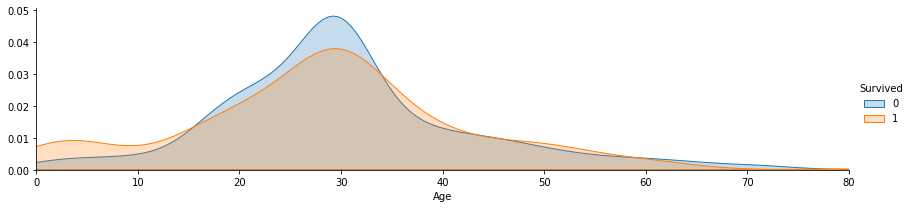

In [137]:
facet = sns.FacetGrid(train_data,hue='Survived',aspect=4)
facet.map(sns.kdeplot,'Age',shade=True)
facet.set(xlim=(0, train_data['Age'].max()))
facet.add_legend()
 
plt.show()

In [138]:
y_train_pred_svc = model_svc.predict(X_train)

In [139]:
f1_score(Y_train,y_train_pred_svc)

0.43407707910750515

In [141]:
(y_train_pred==Y_train).sum()/Y_train.shape[0]

0.8933782267115601

In [142]:
(y_train_pred_svc==Y_train).sum()/Y_train.shape[0]

0.6868686868686869

In [143]:
(y_train_pred_ada==Y_train).sum()/Y_train.shape[0]

0.8204264870931538